In [26]:
from amftrack.pipeline.functions.transport_processing.high_mag_videos.loading import load_video_dataset_local
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
plt.style.use('presentation.mplstyle')
%matplotlib widget
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 100


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
analysis_folder = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract"
analysis_folder_root = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract/"
analysis_folder = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoCut\KymoSpeeDExtract"
analysis_folder_root = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoCut\KymoSpeeDExtract/"
plate_id = "310_20230830"
plate_id_video = "20230904_Plate310"
videos_folder = "/projects/0/einf914/videos/"


In [28]:
indexes = {
"20240414_Plate625" : "20230818_1107_Plate10",
"20240413_Plate612" : "20230818_1107_Plate10",

    
}

In [29]:
all_infos = pd.DataFrame()

for plate_id_video in list(indexes.keys()):
    print(plate_id_video)
    data_obj = load_video_dataset_local(plate_id_video, videos_folder, analysis_folder, analysis_folder_root)
    for index, vid_obj in enumerate(data_obj.video_objs):
        if os.path.exists(vid_obj.edge_adr):
            plt.close("all")
            edge_data_csv = pd.read_csv(vid_obj.edge_adr)
            edge_data_csv['mode'] = vid_obj.dataset['mode']
            edge_data_csv['xpos'] = vid_obj.dataset['xpos']
            edge_data_csv['ypos'] = vid_obj.dataset['ypos']
            edge_data_csv['plate_id'] = vid_obj.dataset['plate_id']
            edge_data_csv['video_int'] = vid_obj.dataset['video_int']
            edge_data_csv['magnification'] = vid_obj.dataset['magnification']
            
            all_infos = pd.concat([all_infos,edge_data_csv])
    # break

20240414_Plate625
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoCut\KymoSpeeDExtract\20240414_Plate625\080\Img\edges_data.csv. Check analysis for 20240414_Plate625_080
20240413_Plate612


In [30]:
all_infos.loc[all_infos['magnification']==20,"speed_left"]*=1/2.5
all_infos.loc[all_infos['magnification']==20,"speed_right"]*=1/2.5

In [31]:
x_pos_init = all_infos.loc[all_infos['video_int'] == 6, 'xpos'].iloc[0]
y_pos_init = all_infos.loc[all_infos['video_int'] == 6, 'ypos'].iloc[0]

# Calculate distance for video_int < 87
mask = all_infos['video_int'] < 36
all_infos.loc[mask, 'dist_init'] = np.sqrt((all_infos.loc[mask, 'ypos'] - y_pos_init) ** 2 +
                                           (all_infos.loc[mask, 'xpos'] - x_pos_init) ** 2)

# Second initial positions for video_int >= 89
x_pos_init = all_infos.loc[all_infos['video_int'] == 37, 'xpos'].iloc[0]
y_pos_init = all_infos.loc[all_infos['video_int'] == 37, 'ypos'].iloc[0]

# Calculate distance for video_int >= 89
mask = all_infos['video_int'] >= 37
all_infos.loc[mask, 'dist_init'] = np.sqrt((all_infos.loc[mask, 'ypos'] - y_pos_init) ** 2 +
                                           (all_infos.loc[mask, 'xpos'] - x_pos_init) ** 2)


In [32]:
list1=[20,24,26,28,30,32,34]
list2 = [k+1 for k in list1]
list3 = [k+31 for k in list1]
list4 = [k+31 for k in list2]

In [33]:
# list1 = range(6,37,2)
# list2 = range(7,37,2)
# list3 = range(37,65,2)
# list4 = range(38,65,2)
list1=[20,24,26,28,30,32,34]
list2 = [k+1 for k in list1]
list3 = [k+31 for k in list1]
list4 = [k+31 for k in list2]
def determine_group(value):
    if value in list1:
        return 1
    elif value in list2:
        return 2
    elif value in list3:
        return 3
    elif value in list4:
        return 4
    else:
        return -1

# Apply the function to the DataFrame
all_infos['group'] = all_infos['video_int'].apply(determine_group)
all_infos['group'] = (all_infos['group']+1)//2

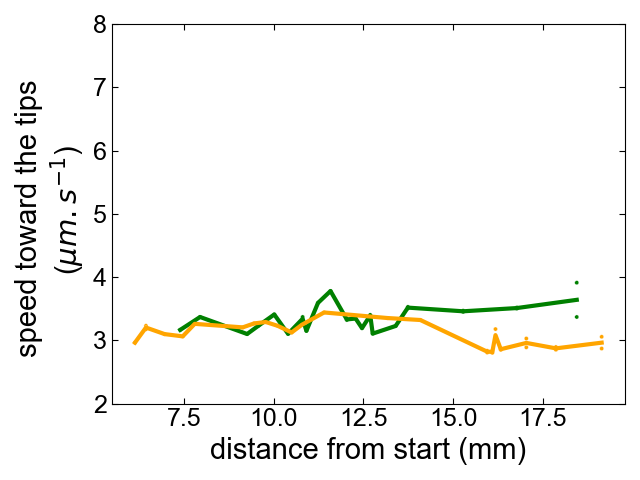

In [34]:
fig,ax = plt.subplots()
select= all_infos[all_infos['group'].isin([1,2,3,4])]
select = select[select['coverage_tot']>0.1]
select = select[select['edge_length']>20]
select = select[select['speed_right']<=4.5]
select = select[select['dist_init']>=0]
palette = {0:"blue",1:"green",2:"orange",3:"red",4:"orange"}



sns.scatterplot(select,x='dist_init',y="speed_right",alpha = 1,hue="group",palette=palette)

sns.lineplot(select,x='dist_init',y="speed_right",alpha = 1,hue="group",palette=palette,estimator="mean",errorbar=None)
# sns.scatterplot(select,x='dist_init',y="speed_left",alpha = 1,hue="group",palette="viridis")

# sns.lineplot(select,x='dist_init',y="speed_left",alpha = 1,hue="group",palette="viridis",estimator="min",errorbar=None)
ax.set_xlabel("distance from start (mm)") #Not really mm...
ax.set_ylabel("speed toward the tips \n ($\mu m.s^{-1}$)") #Not really mm...
ax.set_ylim(2,8)

ax. get_legend().set_visible(False)
plt.tight_layout()


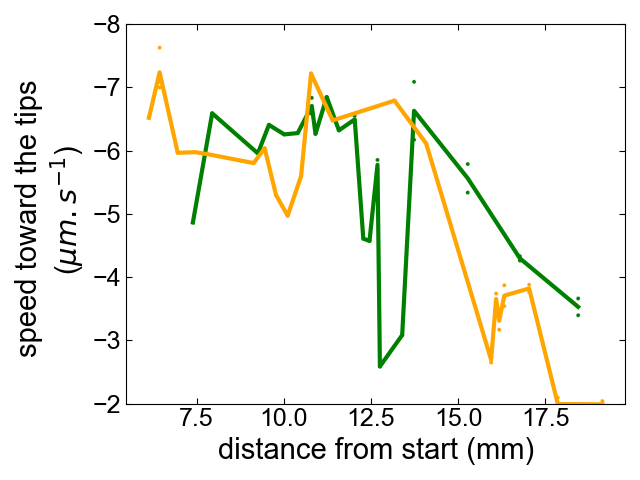

In [35]:
fig,ax = plt.subplots()
select= all_infos[all_infos['group'].isin([1,2,3,4])]
select = select[select['coverage_tot']>0.1]
select = select[select['edge_length']>20]
select = select[select['speed_right']<=4.5]
select = select[select['dist_init']>=0]



sns.scatterplot(select,x='dist_init',y="speed_left",alpha = 1,hue="group",palette=palette)

sns.lineplot(select,x='dist_init',y="speed_left",alpha = 1,hue="group",palette=palette,estimator="mean",errorbar=None)
# sns.scatterplot(select,x='dist_init',y="speed_left",alpha = 1,hue="group",palette="viridis")

# sns.lineplot(select,x='dist_init',y="speed_left",alpha = 1,hue="group",palette="viridis",estimator="min",errorbar=None)
ax.set_xlabel("distance from start (mm)") #Not really mm...
ax.set_ylabel("speed toward the tips \n ($\mu m.s^{-1}$)") #Not really mm...

ax. get_legend().set_visible(False)
ax.set_ylim(-2,-8)

plt.tight_layout()


<AxesSubplot: xlabel='dist_init', ylabel='speed_right'>

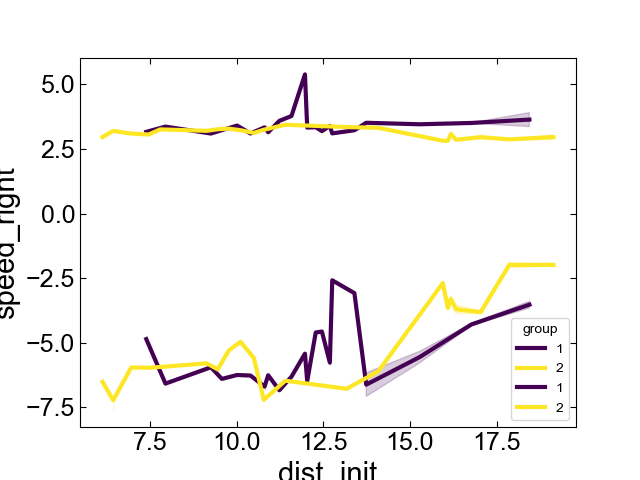

In [11]:
fig,ax = plt.subplots()
select= all_infos[all_infos['group'].isin([1,2,3,4])]
select = select[select['coverage_tot']>0.1]
select = select[select['edge_length']>20]
select = select[select['speed_left']>=-10]



sns.lineplot(select,x='dist_init',y="speed_right",alpha = 1,hue="group",palette="viridis")
sns.lineplot(select,x='dist_init',y="speed_left",alpha = 1,hue="group",palette="viridis")



In [12]:
all_infos['load'] = all_infos['betweenness_automate']/all_infos['width_automate']**2
all_infos['diff_left'] = np.abs(np.abs(all_infos['speed_left']) - 3.15)
all_infos['diff_right'] = np.abs(np.abs(all_infos['speed_right']) - 3.15)

# Assign 'speed_lipid' and 'speed_other' based on which speed is closer to 3.15
all_infos['speed_lipid'] = np.where(all_infos['diff_left'] <= all_infos['diff_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_other'] = np.where(all_infos['diff_left'] > all_infos['diff_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_other_abs'] = np.abs(all_infos['speed_other'])
all_infos['speed_main'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_sub'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['speed_right'], all_infos['speed_left'])
all_infos['speed_sub_abs'] = np.abs(all_infos['speed_sub'])

all_infos['speed_main_abs'] = np.abs(all_infos['speed_main'])
all_infos['coverage_main'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['coverage_left'], all_infos['coverage_right'])

# Drop the intermediate 'diff_left' and 'diff_right' columns if they are no longer needed
all_infos = all_infos.drop(['diff_left', 'diff_right'], axis=1)

KeyError: 'betweenness_automate'

In [ ]:
all_infos.columns

In [ ]:
infos_F = all_infos.loc[all_infos['mode']=='F']
infos_F.drop(['edge_length','straight_length',"network_end","network_begin","mapping_quality","width_automate","betweenness_automate","load","mode"],axis = 1)
infos_BF = all_infos.loc[all_infos['mode']=='BF']
infos_BF = infos_BF.drop(['mode'], axis=1)
merged_df = infos_F.merge(infos_BF,on = ["xpos","ypos","plate_id","network_end","network_begin"],suffixes=("F","BF"))

In [ ]:
all_infos['uniquepos'] = all_infos['xpos'].astype(str)+all_infos['ypos'].astype(str)+all_infos['plate_id']+all_infos['network_end'].astype(str)++all_infos['network_begin'].astype(str)
len(all_infos),len(all_infos['uniquepos'].unique())

In [ ]:
len(merged_df)

In [ ]:
fig,ax = plt.subplots()
select = merged_df[merged_df['coverage_rightF']>merged_df['coverage_leftF']]
select = select[select['coverage_rightF']>0.1]

select = select[select['speed_rightF']<15]

sns.scatterplot(select,x='speed_rightF',y="speed_rightBF",alpha = 1)
select = merged_df[merged_df['coverage_leftF']>merged_df['coverage_rightF']]
select = select[select['coverage_leftF']>0.1]

select = select[select['speed_leftF']>-15]

sns.scatterplot(select,x='speed_leftF',y="speed_leftBF",alpha = 1)
ax.plot([-5,5],[-5,5])

In [ ]:
merged_df['speed_lipid'] = np.where(merged_df['coverage_leftF'] > merged_df['coverage_rightF'], merged_df['speed_leftBF'], merged_df['speed_rightBF'])
merged_df['speed_other'] = np.where(merged_df['coverage_leftF'] > merged_df['coverage_rightF'], merged_df['speed_rightBF'], merged_df['speed_leftBF'])
merged_df['speed_lipid2'] = np.where(merged_df['flux_avgF'] < 0, merged_df['speed_leftBF'], merged_df['speed_rightBF'])
merged_df['speed_other2'] = np.where(merged_df['flux_avgF'] < 0, merged_df['speed_rightBF'], merged_df['speed_leftBF'])
merged_df['abs_speed_lipid2'] = np.abs(merged_df['speed_lipid2'])
merged_df['abs_speed_other2'] = np.abs(merged_df['speed_other2'])


In [ ]:
select = merged_df
fig,ax = plt.subplots()
select = select[select['coverage_totBF']>0.05]

sns.histplot(np.abs(select['speed_lipid']),color='red',stat="density",kde=True,label = "speed lipid direction")
sns.histplot(np.abs(select['speed_other']),color='blue',stat="density",kde=True,label = "speed other direction")
ax.legend(fontsize='large')
ax.set_xlabel("v ($\mu m/s$)")
ax.set_xlim(0,12.4)
plt.tight_layout()

In [ ]:
select = merged_df
fig,ax = plt.subplots()
select = select[select['coverage_totBF']>0.05]

sns.histplot(np.abs(select['speed_lipid2']),color='red',stat="density",kde=True,label = "speed lipid direction")
sns.histplot(np.abs(select['speed_other2']),color='blue',stat="density",kde=True,label = "speed other direction")
ax.legend(fontsize='large')
ax.set_xlabel("v ($\mu m/s$)")
plt.tight_layout()

In [ ]:
all_infos_sub.columns

In [ ]:
fig,ax = plt.subplots(figsize = (6,6))
all_infos_sub = merged_df[merged_df['plate_id']=='20230905_Plate310']
select = all_infos_sub

select = select[select['coverage_totBF']>0.05]
select = select[select['speed_rightBF']<=15]
select = select[select['speed_lipid2']<=15]

selected_columns = select[['width_automateF',"betweenness_automateBF",'abs_speed_lipid2','abs_speed_other2']]

# Calculating Pearson correlation matrix
correlation_matrix = selected_columns.corr()

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.tight_layout()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming merged_df is your initial DataFrame

# Step 1: Parse the Date from plate_id and add it as a new column
merged_df['date'] = pd.to_datetime(merged_df['plate_id'].str.split('_').str[0], format='%Y%m%d')

# Number of bootstrap samples
n_bootstraps = 1000

# Initialize a dictionary to store correlation dataframes for each pair
correlations_dict = {}
uncertainty_dict = {}
dates = []
for date, group in merged_df.groupby('date'):
    dates.append(date)
    select = group[(group['coverage_totBF'] > 0.05) & 
                   (group['speed_rightBF'] <= 15) & 
                    (group['mapping_qualityBF'] <= 15) &
                   
                   (group['speed_lipid2'] <= 15)]
    
    selected_columns = select[['width_automateF', "betweenness_automateBF", 'abs_speed_lipid2', 'abs_speed_other2']]
    correlation_matrix = selected_columns.corr()

    # Iterate through the correlation matrix to update our dictionaries
    for row in correlation_matrix.index:
        for col in correlation_matrix.columns:
            if row >= col:  # Avoid duplicating pairs and self-correlations
                continue
            key = f"{row} vs {col}"
            
            # Perform bootstrap resampling for the pair
            bootstrapped_corrs = []
            for _ in range(n_bootstraps):
                bootstrap_sample = selected_columns[[row, col]].sample(n=select.shape[0], replace=True)
                corr = bootstrap_sample.corr().iloc[0, 1]
                bootstrapped_corrs.append(corr)
            
            # Calculate mean and 95% confidence interval
            mean_corr = np.mean(bootstrapped_corrs)
            lower_bound = np.percentile(bootstrapped_corrs, 2.5)
            upper_bound = np.percentile(bootstrapped_corrs, 97.5)
            
            # Update correlations_dict
            if key not in correlations_dict:
                correlations_dict[key] = pd.DataFrame(columns=['date', 'correlation'])
            temp_df = pd.DataFrame({'date': [date], 'correlation': [mean_corr]})
            correlations_dict[key] = pd.concat([correlations_dict[key], temp_df], ignore_index=True)
            
            # Update uncertainty_dict
            if key not in uncertainty_dict:
                uncertainty_dict[key] = pd.DataFrame(columns=['date', 'lower', 'upper'])
            temp_uncertainty_df = pd.DataFrame({'date': [date], 'lower': [lower_bound], 'upper': [upper_bound]})
            uncertainty_dict[key] = pd.concat([uncertainty_dict[key], temp_uncertainty_df], ignore_index=True)


In [ ]:
import matplotlib.pyplot as plt

# Assuming we have 4 variables, leading to a 3x3 grid of correlations (excluding self-correlations)
variables = ['width_automateF', 'betweenness_automateBF', 'abs_speed_lipid2', 'abs_speed_other2']
variable_names = ['$r$', 'BC', '$v_{lipid}$', '$v_{other}$']
# First, calculate the minimum date to use as a baseline

# Convert the date differences from the minimum date into days
# This involves first converting the timedelta results into 'timedelta64[D]' to get days,
# and then converting to integers.


n = len(variables)

# Create a figure and axes in a grid
fig, axs = plt.subplots(n-1, n-1, figsize=(5, 5), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Function to find the corresponding dataframe for a given pair
def find_df_for_pair(row_var, col_var):
    for key in correlations_dict:
        if row_var in key and col_var in key:
            return correlations_dict[key].sort_values('date'), uncertainty_dict[key].sort_values('date')
    return None, None

# Plotting in a matrix layout
for i in range(n-1):
    for j in range(i+1, n):
        row_var = variables[i]
        col_var = variables[j]
        correlation_df, uncertainty_df = find_df_for_pair(row_var, col_var)
        min_date = np.min(correlation_df['date'])
        correlation_df['days_since_min'] = (correlation_df['date'] - min_date).dt.days
        uncertainty_df['days_since_min'] = (uncertainty_df['date'] - min_date).dt.days
        if correlation_df is not None and uncertainty_df is not None:
            axs[i, j-1].plot(correlation_df['days_since_min'], correlation_df['correlation'], marker='o', label=f'{row_var} vs {col_var}')
            axs[i, j-1].fill_between(uncertainty_df['days_since_min'], uncertainty_df['lower'], uncertainty_df['upper'], color='gray', alpha=0.3)
            # axs[i, j-1].set_title(f'{row_var} vs {col_var}')
            # axs[i, j-1].grid(True)
            # axs[i, j-1].legend()

# Adjusting labels for clarity
for ax, col_var in zip(axs[0], variable_names[1:]):
    ax.set_title(col_var,fontdict = {"fontsize" : 15})
for ax, row_var,date in zip(axs[:,0], variable_names[:-1],dates):
    ax.set_ylim(-0.5,0.5)

for j in range(n-1):
    # Assuming we're sharing x-axis, we only need to adjust the last row
    axs[n-2, j].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels to 45 degrees

for i in range(n-1):
    for j in range(n-1):
        # Now explicitly skipping lower triangle plots by hiding those axes
        if i > j:
            axs[i, j].axis('off')  # This hides the axes in the lower triangle and the diagonal
        else:
            axs[i, j].hlines(0,0,4,color="black",linestyle="dashed")
        if i==j:
            axs[i, j].set_ylabel(variable_names[:-1][i], rotation=90, size=15)
            
            
  

# plt.tight_layout()
plt.show()


In [ ]:
fig,ax = plt.subplots()

select = all_infos[all_infos['mode']=="F"]
# select = select[select['coverage_tot']>0.1]
select = select[select['speed_right']<=15]

sns.scatterplot(select,x='coverage_right',y="coverage_left",alpha = 1,hue="mode")
# sns.scatterplot(select,x='coverage_left',y="speed_left",alpha = 0.2,hue="mode")

In [ ]:
import seaborn as sns
thresh_F = 0.05
fig,ax = plt.subplots()
# select = all_infos[all_infos['mode']=="F"]
# select = select[select['coverage_right']>thresh_F]
# select = select[select['speed_right']<=15]

# sns.histplot(select['speed_right'],stat="density",kde=True,color='blue')
# # sns.histplot(select['speed_left'],stat="density",kde=True,color='blue')
# select = all_infos[all_infos['mode']=="F"]
# select = select[select['coverage_left']>thresh_F]
# select = select[select['speed_right']<=15]

# sns.histplot(select['speed_left'],stat="density",kde=True,color='blue')
select = all_infos[all_infos['mode']=="F"]
select = select[select['coverage_main']>0.05]

select = select[select['speed_right']<=15]
selectp = select[select['speed_main']>0]
selectm = select[select['speed_main']<0]

sns.histplot(selectp['speed_main'],stat="density",color='blue')
sns.histplot(selectm['speed_main'],stat="density",color='blue')

# sns.histplot(select['speed_left'])
select = all_infos[all_infos['mode']=="BF"]
select = select[select['coverage_tot']>0.05]
select = select[select['speed_right']<=15]
sns.histplot(select['speed_right'],stat="density",kde=True,color='red')
sns.histplot(select['speed_left'],stat="density",kde=True,color='red')

# sns.histplot(select['speed_left'])


In [ ]:
fig,ax = plt.subplots(figsize = (6,6))
select = all_infos[all_infos['coverage_tot']>0.05]
select = select[select['mode']=="BF"]

select = select[select['speed_right']<=15]
sns.histplot(select['speed_main'],stat="density",kde=True,color='blue')
sns.histplot(select['speed_sub'],stat="density",kde=True,color='red')

In [ ]:
fig,ax = plt.subplots(figsize = (6,6))
select = all_infos[all_infos['coverage_tot']>0.05]
select = select[select['speed_right']<=15]

sns.scatterplot(select,x='speed_main',y="speed_sub",alpha = 0.2,hue="mode")

In [ ]:
fig,ax = plt.subplots(figsize = (6,6))
all_infos_sub = all_infos[all_infos['plate_id']=='20230903_Plate310']

select = all_infos_sub[all_infos_sub['mode']=="BF"]
select = select[select['coverage_tot']>0.05]
select = select[select['speed_right']<=15]
sns.scatterplot(select,x='load',y="speed_sub_abs")

In [ ]:
sns.scatterplot(select,x='load',y="speed_left")

In [ ]:
fig,ax = plt.subplots(figsize = (3,3))

sns.scatterplot(select,x='betweenness_automate',y="speed_other_abs")

In [ ]:
fig,ax = plt.subplots(figsize = (6,6))
all_infos_sub = all_infos[all_infos['plate_id']=='20230902_Plate310']
select = all_infos_sub[all_infos_sub['mode']=="BF"]

select = select[select['coverage_tot']>0.05]
select = select[select['speed_right']<=15]
selected_columns = select[['width_automate','betweenness_automate','load','speed_main_abs','speed_sub_abs','speed_left', 'speed_right']]

# Calculating Pearson correlation matrix
correlation_matrix = selected_columns.corr()

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
# plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
selected_columns = select[['width_automate', 'speed_left', 'speed_right','betweenness_automate','load']]

# Calculating Pearson correlation matrix
correlation_matrix = selected_columns.corr()

# Creating the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)